# Exploitary Data Analysis

### Load the Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("Cleaned_Dataset.csv", dtype={"timestamp": str})

# Convert timestamp to datetime for time-series plots only
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Columns to include in EDA
numeric_cols = [
    "gps_latitude",
    "gps_longitude",
    "lidar_points",
    "radar_objects",
    "camera_objects",
    "packet_drop_rate",
    "packet_delivery_ratio",
    "latency_ms",
    "throughput_kbps",
    "collision_detected",
    "obstacle_detection_accuracy",
    "decision_accuracy"
]

df_numeric = df[numeric_cols]

### Summary of the Cleaned Dataset

In [2]:
df_numeric.describe()

,gps_latitude,gps_longitude,lidar_points,radar_objects,camera_objects,packet_drop_rate,packet_delivery_ratio,latency_ms,throughput_kbps,collision_detected,obstacle_detection_accuracy,decision_accuracy
count,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000
mean,37.499000,-121.505809,19983.899130,27.277391,26.789130,0.150195,0.850363,156.076087,549.044348,0.052174,0.846967,0.849623
std,0.289869,0.294706,5780.863289,12.779745,12.875871,0.085087,0.086613,82.755323,263.700168,0.222426,0.086724,0.088263
min,37.000115,-121.999854,10002.000000,5.000000,5.000000,0.000000,0.700000,10.000000,100.000000,0.000000,0.700000,0.700000
25%,37.243931,-121.754191,14929.000000,16.000000,16.000000,0.076000,0.776000,87.000000,318.000000,0.000000,0.770000,0.770000
50%,37.499082,-121.512347,19942.000000,27.000000,26.500000,0.153000,0.852000,158.000000,546.500000,0.000000,0.850000,0.850000
75%,37.751229,-121.244705,25039.250000,38.000000,38.000000,0.221000,0.928000,225.000000,782.000000,0.000000,0.920000,0.930000
max,37.999677,-121.001123,29983.000000,49.000000,49.000000,0.300000,1.000000,299.000000,999.000000,1.000000,1.000000,1.000000


### Histograms (Univariate Distributions)

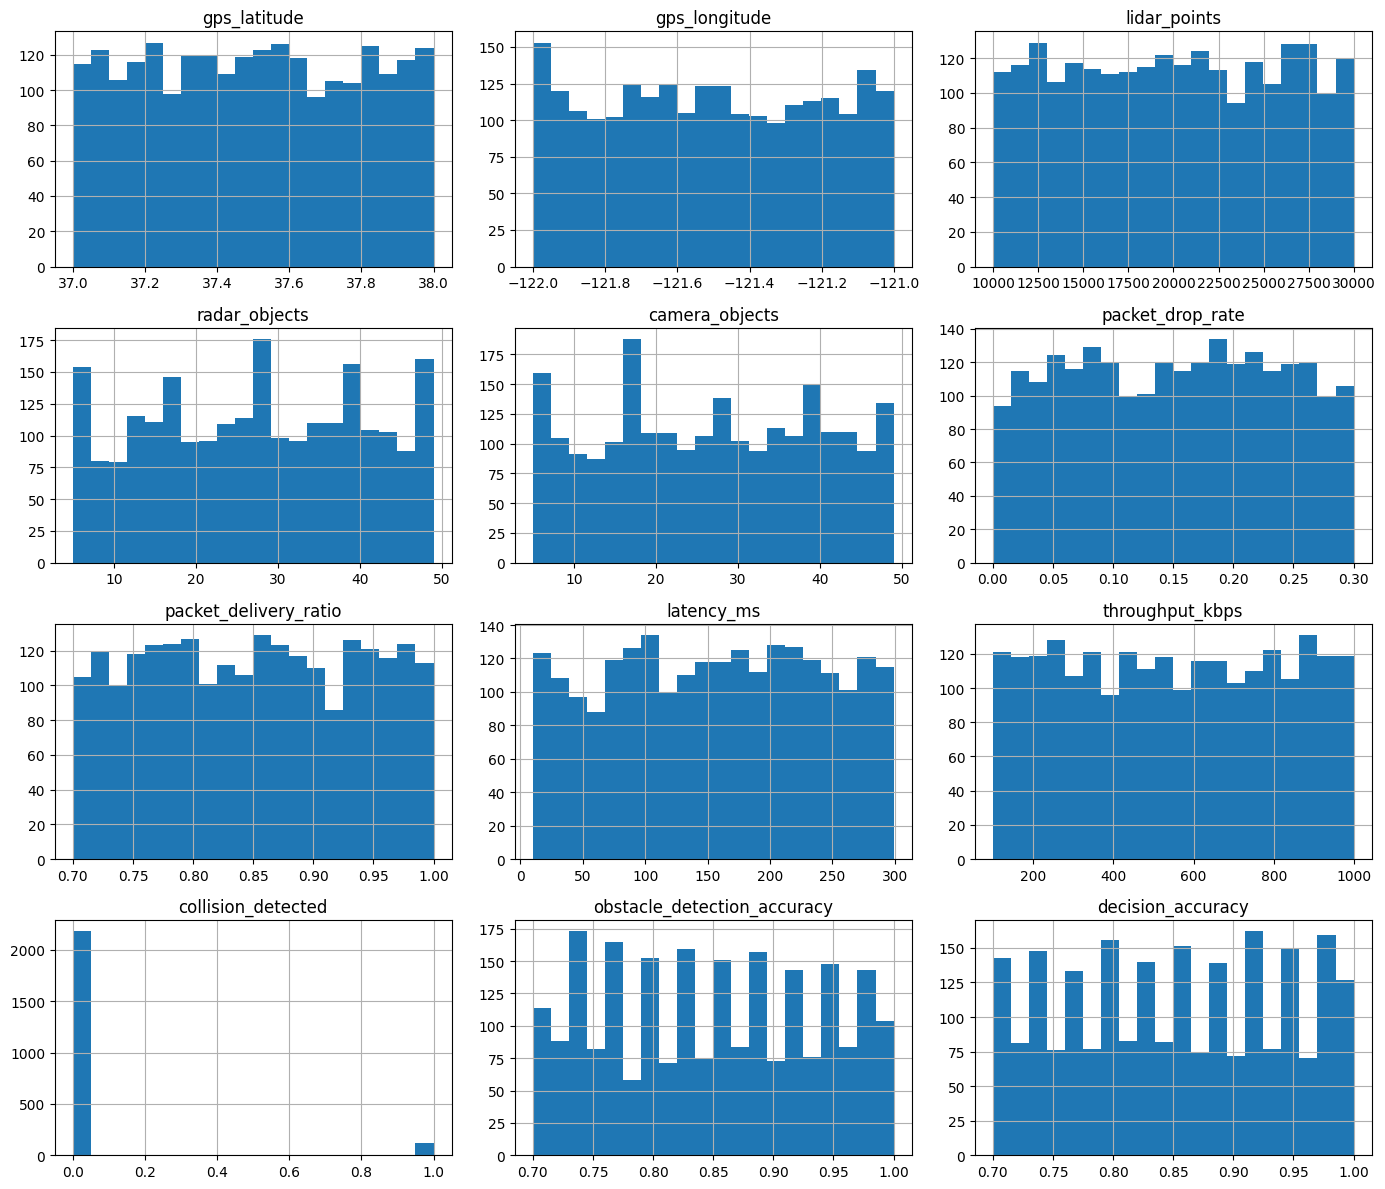

In [3]:
df_numeric.hist(figsize=(14, 12), bins=20)
plt.tight_layout()
plt.show()

### Correlation Heatmap

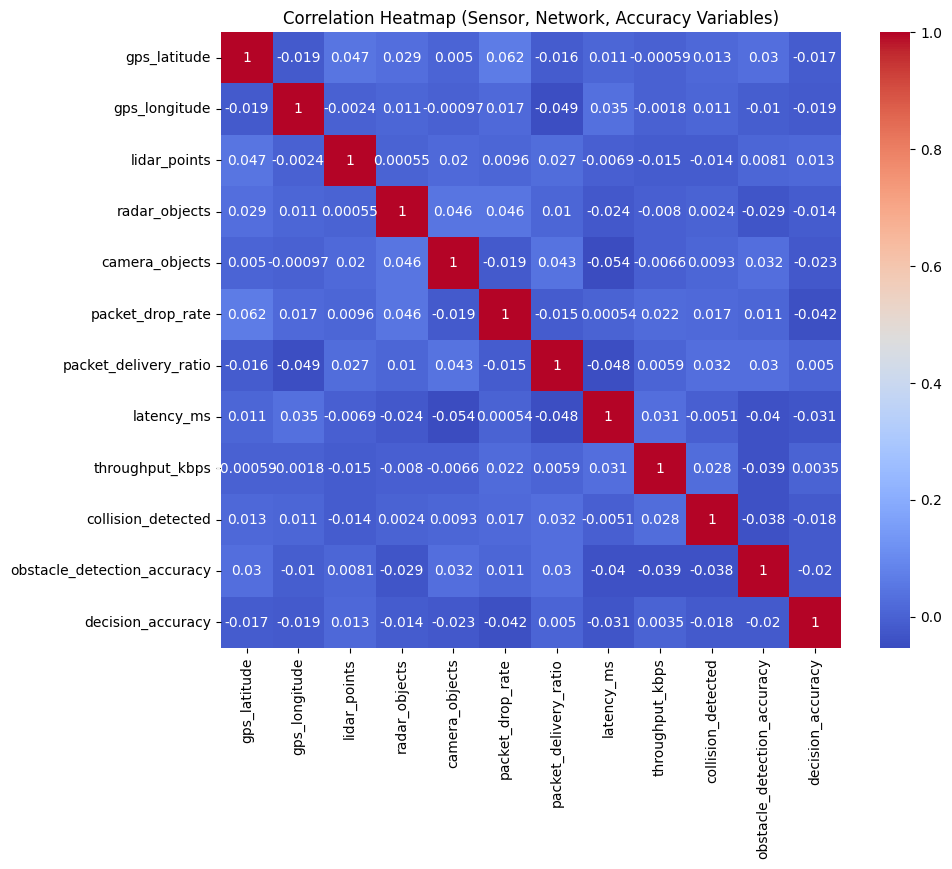

In [4]:
plt.figure(figsize=(10, 8))
sns.heatmap(df_numeric.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap (Sensor, Network, Accuracy Variables)")
plt.show()

### Key Scatter Plots

Sensors

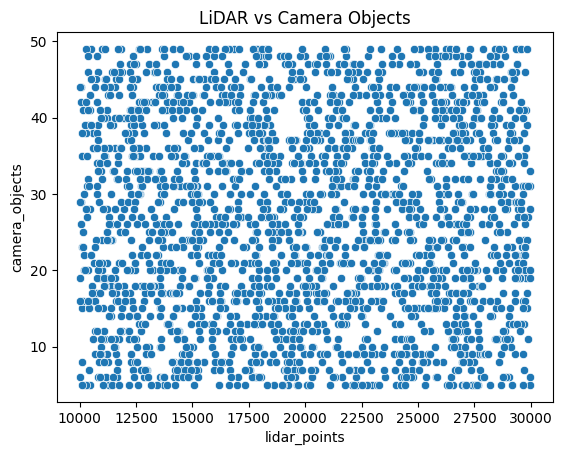

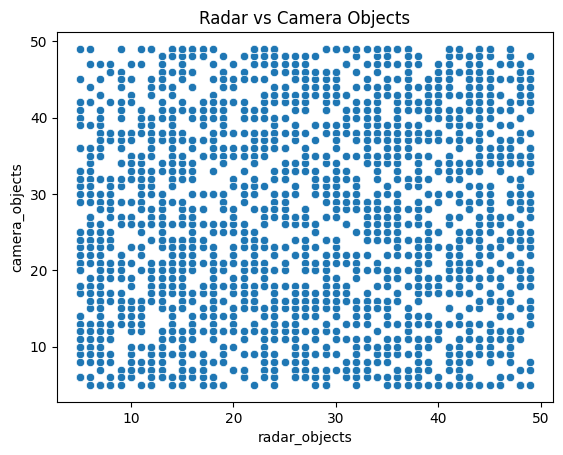

In [5]:
sns.scatterplot(data=df, x="lidar_points", y="camera_objects")
plt.title("LiDAR vs Camera Objects")
plt.show()

sns.scatterplot(data=df, x="radar_objects", y="camera_objects")
plt.title("Radar vs Camera Objects")
plt.show()

Network

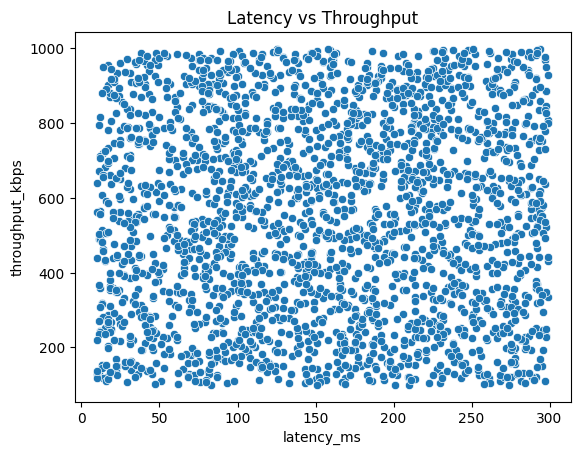

In [6]:
sns.scatterplot(data=df, x="latency_ms", y="throughput_kbps")
plt.title("Latency vs Throughput")
plt.show()

Accuracy

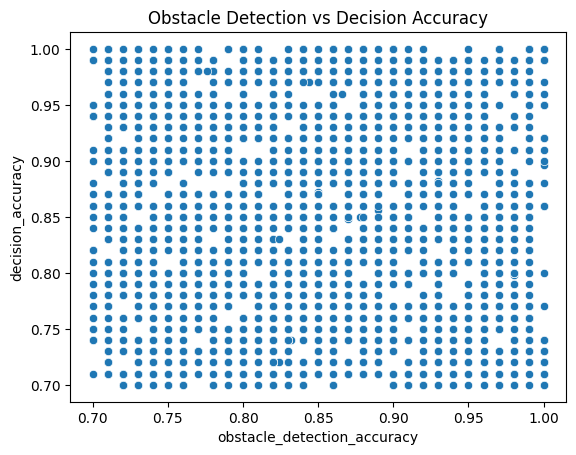

In [7]:
sns.scatterplot(data=df, x="obstacle_detection_accuracy", 
                y="decision_accuracy")
plt.title("Obstacle Detection vs Decision Accuracy")
plt.show()

### Time Series Plots

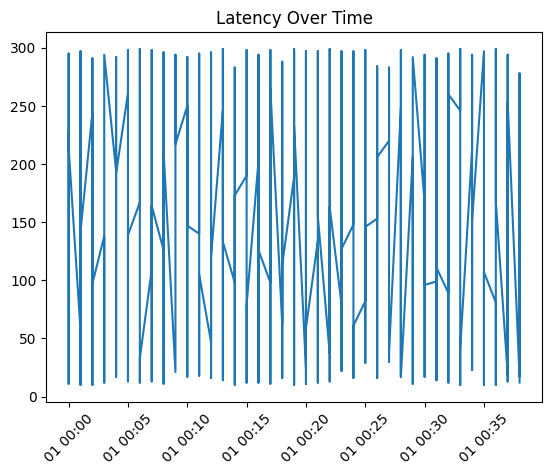

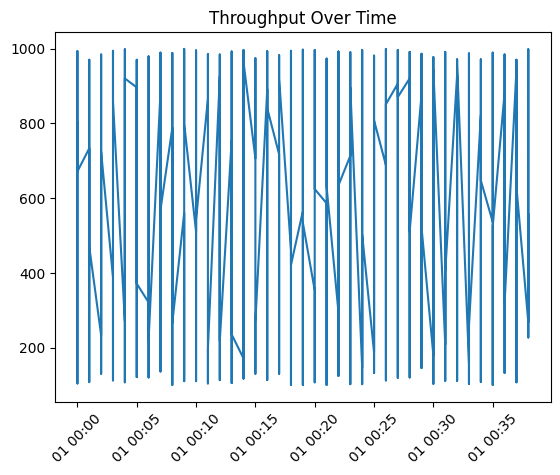

In [8]:
df_sorted = df.sort_values("timestamp")

plt.plot(df_sorted["timestamp"], df_sorted["latency_ms"])
plt.title("Latency Over Time")
plt.xticks(rotation=45)
plt.show()

plt.plot(df_sorted["timestamp"], df_sorted["throughput_kbps"])
plt.title("Throughput Over Time")
plt.xticks(rotation=45)
plt.show()

### Outlier Detection (Boxplots)

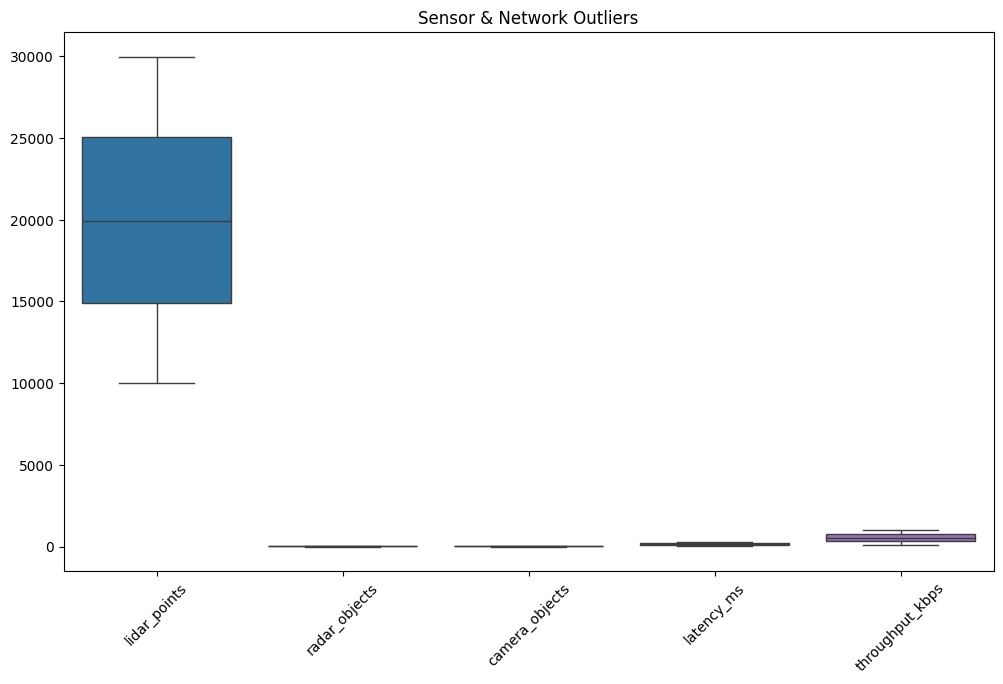

In [9]:
plt.figure(figsize=(12, 7))
sns.boxplot(data=df[['lidar_points','radar_objects','camera_objects',
                     'latency_ms','throughput_kbps']])
plt.title("Sensor & Network Outliers")
plt.xticks(rotation=45)
plt.show()

✔ “Strong correlation between sensor detections (LiDAR, Radar, Camera) indicates consistent cross-sensor detection during vehicle operation.”

✔ “Latency is negatively correlated with throughput, showing typical wireless network behavior under load.”

✔ “Higher packet drop rate reduces decision accuracy, highlighting the importance of network reliability for autonomous driving.”

✔ “Outliers in latency correspond to low-throughput periods, possibly due to congestion or interference.”

✔ “Accuracy metrics remain stable (0.7–0.9), except when throughput drops drastically.”